In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load JSON data
with open("belmont_properties.json", "r") as f:
    data = json.load(f)

# Flatten JSON into a DataFrame
df = pd.json_normalize(data["results"])
df.head(5)

,area_level,area_name,gnaf_pid,listing_date,price,property_type,address.sa1,address.sal,address.state,address.street,attributes.bathrooms,attributes.bedrooms,attributes.building_size,attributes.description,attributes.garage_spaces,attributes.land_size,coordinates.latitude,coordinates.longitude
0,address,"17 Dulungra Avenue, Belmont North, NSW",GANSW715835616,2025-10-08,1450000,House,11101120624,Belmont North,NSW,17 Dulungra Avenue,3.0,5.0,None,Expressions of Interest closes Tuesday 28th Oc...,2.0,605 m²,-33.012044,151.668516
1,address,"46 Arlington Street, Belmont North, NSW",GANSW704076654,2025-08-22,1500000,House,11101120618,Belmont North,NSW,46 Arlington Street,4.0,6.0,nan,A unique opportunity to secure two stylish and...,4.0,638.6,-33.016456,151.677000
2,address,"75 Buttaba Avenue, Belmont North, NSW",GANSW704083961,2025-10-23,1100000,House,11101120613,Belmont North,NSW,75 Buttaba Avenue,2.0,3.0,113.0,This is the one that keeps everyone happy...\n...,6.0,696.0,-33.020822,151.672290
3,address,"38 Buttaba Avenue, Belmont North, NSW",GANSW704078796,2025-10-30,900000,House,11101120605,Belmont North,NSW,38 Buttaba Avenue,1.0,2.0,66.0,Let's be straight...opportunities like this do...,2.0,675.0,-33.020835,151.676192
4,address,"5 Pinnaroo Close, Belmont North, NSW",GANSW704079805,2025-10-13,1150000,House,11101120604,Belmont North,NSW,5 Pinnaroo Close,3.0,4.0,nan,This large family home offers many application...,3.0,768.0,-33.020061,151.680054


In [3]:
# Rename useful columns
df = df.rename(columns={
    "address.street": "street",
    "address.sal": "suburb",
    "attributes.bedrooms": "bedrooms",
    "attributes.bathrooms": "bathrooms",
    "attributes.land_size": "land_size",
    "attributes.building_size": "building_size",
    "attributes.garage_spaces": "garage_spaces",
    "attributes.description": "description"
})

# Convert numeric fields
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors="coerce")
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors="coerce")
df["garage_spaces"] = pd.to_numeric(df["garage_spaces"], errors="coerce")

# Clean land size (remove m², convert to float)
df["land_size"] = (
    df["land_size"]
    .astype(str)
    .str.replace(" m²", "", regex=False)
    .str.replace("nan", "")
    .replace("None", None)
)
df["land_size"] = pd.to_numeric(df["land_size"], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area_level             9 non-null      object 
 1   area_name              9 non-null      object 
 2   gnaf_pid               9 non-null      object 
 3   listing_date           9 non-null      object 
 4   price                  9 non-null      int64  
 5   property_type          9 non-null      object 
 6   address.sa1            9 non-null      object 
 7   suburb                 9 non-null      object 
 8   address.state          9 non-null      object 
 9   street                 9 non-null      object 
 10  bathrooms              8 non-null      float64
 11  bedrooms               8 non-null      float64
 12  building_size          9 non-null      object 
 13  description            9 non-null      object 
 14  garage_spaces          8 non-null      float64
 15  land_size 

In [4]:
# Check for missing values
df.isna().sum()

# Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,9.0,1.227778e+06,411446.466074,575000.000000,900000.000000,1.150000e+06,1.500000e+06,1.800000e+06
bathrooms,8.0,2.250000e+00,1.164965,1.000000,1.000000,2.500000e+00,3.000000e+00,4.000000e+00
bedrooms,8.0,3.625000e+00,1.407886,2.000000,2.750000,3.500000e+00,4.250000e+00,6.000000e+00
garage_spaces,8.0,2.875000e+00,1.552648,1.000000,2.000000,2.500000e+00,3.250000e+00,6.000000e+00
land_size,8.0,7.630000e+02,259.945577,556.400000,630.200000,6.855000e+02,7.730000e+02,1.377000e+03
coordinates.latitude,9.0,-3.302056e+01,0.004110,-33.025775,-33.023058,-3.302084e+01,-3.302006e+01,-3.301204e+01
coordinates.longitude,9.0,1.516723e+02,0.005340,151.663819,151.668516,1.516723e+02,1.516762e+02,1.516801e+02


In [5]:
print("Total listings:", len(df))
print("Average price: ${:,.0f}".format(df["price"].mean()))
print("Median price: ${:,.0f}".format(df["price"].median()))
print("Property types:", df["property_type"].value_counts().to_dict())

Total listings: 9
Average price: $1,227,778
Median price: $1,150,000
Property types: {'House': 7, 'Unit': 2}


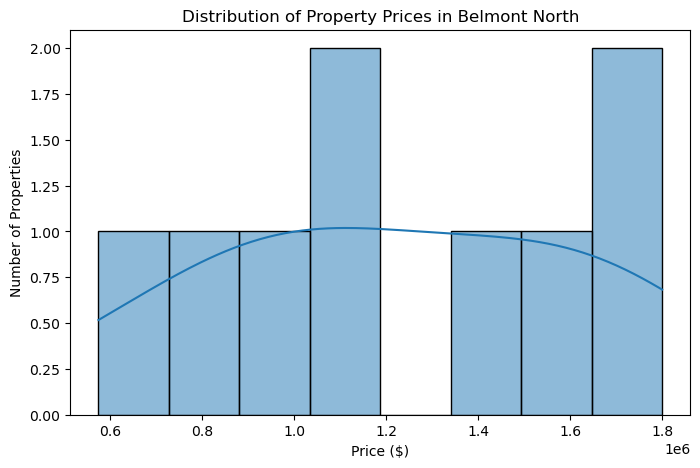

In [6]:
# Visualize price distribution
plt.figure(figsize=(8,5))
sns.histplot(df["price"], kde=True, bins=8)
plt.title("Distribution of Property Prices in Belmont North")
plt.xlabel("Price ($)")
plt.ylabel("Number of Properties")
plt.show()

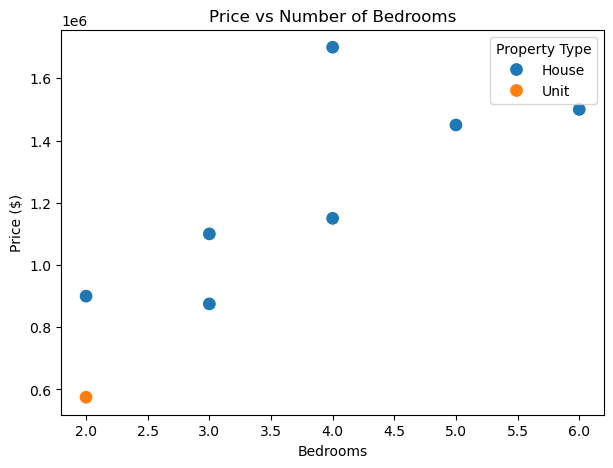

price            1.000000
bathrooms        0.861799
bedrooms         0.809421
land_size        0.628125
garage_spaces    0.185404
Name: price, dtype: float64

In [7]:
# Scatter plot of price vs bedrooms
plt.figure(figsize=(7,5))
sns.scatterplot(x="bedrooms", y="price", data=df, hue="property_type", s=100)
plt.title("Price vs Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price ($)")
plt.legend(title="Property Type")
plt.show()

corr = df[["bedrooms", "bathrooms", "garage_spaces", "land_size", "price"]].corr()
corr["price"].sort_values(ascending=False)

In [8]:
# Display top 3 most expensive and bottom 3 most affordable properties
top5 = df.nlargest(3, "price")[["street", "price", "bedrooms", "bathrooms"]]
bottom5 = df.nsmallest(3, "price")[["street", "price", "bedrooms", "bathrooms"]]

print(" Top 3 Most Expensive Properties:\n", top5, "\n")
print(" 3 Most Affordable Properties:\n", bottom5)

 Top 3 Most Expensive Properties:
                     street    price  bedrooms  bathrooms
8  380-384 Pacific Highway  1800000       NaN        NaN
7   57 John Darling Avenue  1700000       4.0        3.0
1      46 Arlington Street  1500000       6.0        4.0 

 3 Most Affordable Properties:
                      street   price  bedrooms  bathrooms
6  Unit 2, 1 Vincent Street  575000       2.0        1.0
5       30 John Fisher Road  875000       3.0        1.0
3         38 Buttaba Avenue  900000       2.0        1.0


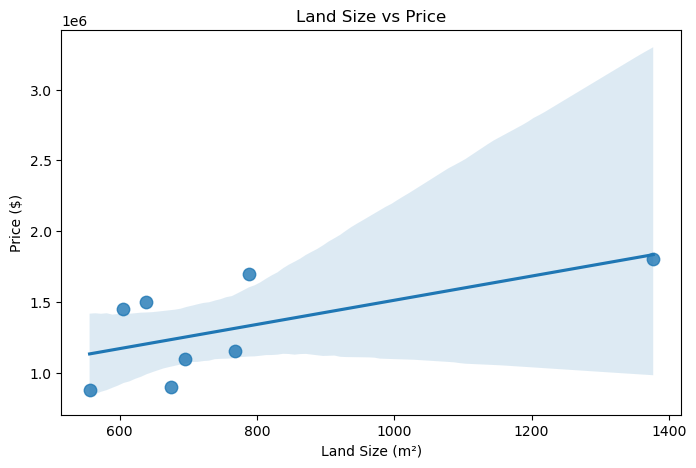

In [9]:
# Scatter plot of land size vs price
plt.figure(figsize=(8,5))
sns.regplot(x="land_size", y="price", data=df, scatter_kws={"s":80})
plt.title("Land Size vs Price")
plt.xlabel("Land Size (m²)")
plt.ylabel("Price ($)")
plt.show()

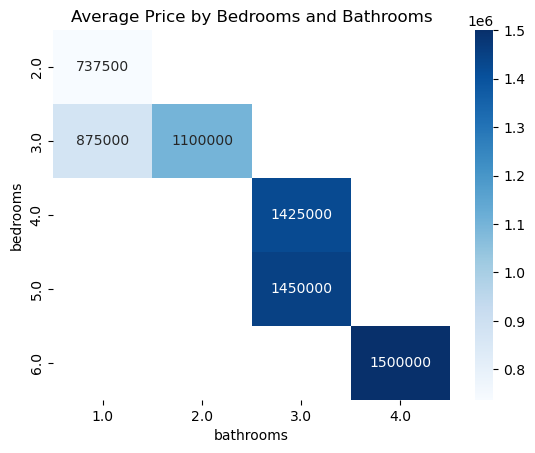

In [10]:
# Heatmap of average price by bedrooms and bathrooms
pivot = df.pivot_table(values="price", index="bedrooms", columns="bathrooms", aggfunc="mean")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Average Price by Bedrooms and Bathrooms")
plt.show()

In [11]:
# Summary statistics
summary = {
    "avg_price_per_bedroom": (df["price"] / df["bedrooms"]).mean(),
    "avg_land_price_per_m2": (df["price"] / df["land_size"]).mean(),
    "avg_bathrooms": df["bathrooms"].mean(),
    "avg_garage_spaces": df["garage_spaces"].mean()
}

for k,v in summary.items():
    print(f"{k.replace('_',' ').title()}: {v:,.2f}")

Avg Price Per Bedroom: 331,041.67
Avg Land Price Per M2: 1,774.24
Avg Bathrooms: 2.25
Avg Garage Spaces: 2.88


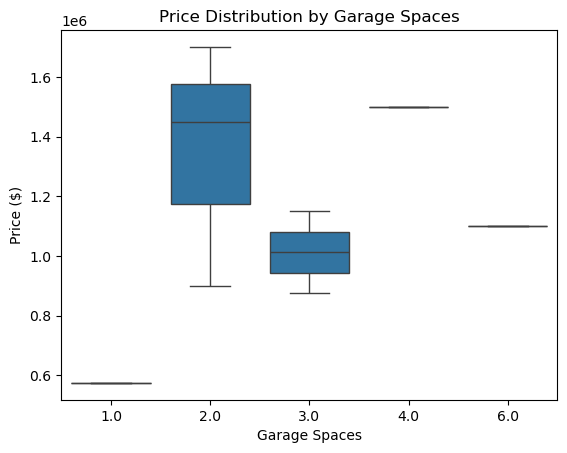

In [12]:
# Box plot of price by garage spaces
sns.boxplot(x="garage_spaces", y="price", data=df)
plt.title("Price Distribution by Garage Spaces")
plt.xlabel("Garage Spaces")
plt.ylabel("Price ($)")
plt.show()

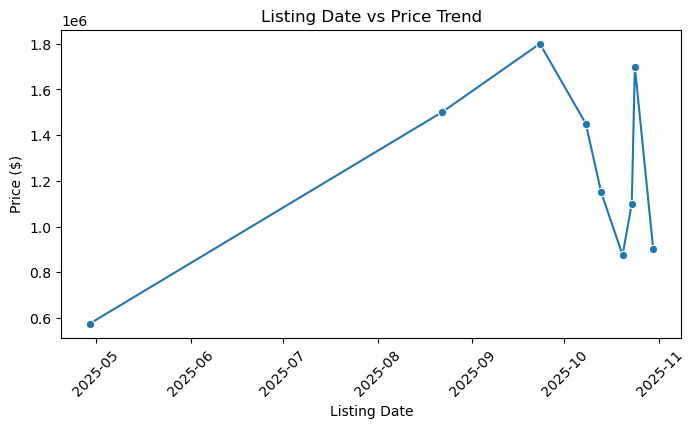

In [13]:
# Line plot of listing date vs price trend
df["listing_date"] = pd.to_datetime(df["listing_date"])
df = df.sort_values("listing_date")

plt.figure(figsize=(8,4))
sns.lineplot(x="listing_date", y="price", marker="o", data=df)
plt.title("Listing Date vs Price Trend")
plt.xlabel("Listing Date")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import folium
import json

# --- Load your data (assuming it's saved as belmont_properties.json) ---
with open("belmont_properties.json", "r") as f:
    data = json.load(f)

df = pd.json_normalize(data["results"])

# --- Clean up columns ---
df = df.rename(columns={
    "address.street": "street",
    "address.sal": "suburb",
    "attributes.bedrooms": "bedrooms",
    "attributes.bathrooms": "bathrooms",
    "attributes.land_size": "land_size",
    "attributes.garage_spaces": "garage_spaces",
    "coordinates.latitude": "latitude",
    "coordinates.longitude": "longitude"
})

# --- Create a base map centered on Belmont North ---
m = folium.Map(location=[-33.02, 151.67], zoom_start=13, tiles="cartodb positron")

# --- Define color scheme by property type ---
def get_color(ptype):
    if ptype == "House":
        return "blue"
    elif ptype == "Unit":
        return "green"
    else:
        return "red"

# --- Add property markers ---
for _, row in df.iterrows():
    price = f"${row['price']:,}"
    popup_html = f"""
    <b>{row['street']}</b><br>
    <b>Suburb:</b> {row['suburb']}<br>
    <b>Type:</b> {row['property_type']}<br>
    <b>Price:</b> {price}<br>
    <b>Bedrooms:</b> {row['bedrooms']} | <b>Bathrooms:</b> {row['bathrooms']}<br>
    <b>Garage Spaces:</b> {row['garage_spaces']}<br>
    <b>Land Size:</b> {row['land_size']} m²
    """
    
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=7,
        color=get_color(row["property_type"]),
        fill=True,
        fill_opacity=0.8,
        popup=folium.Popup(popup_html, max_width=300),
        tooltip=row["street"]
    ).add_to(m)

# --- Save map as an interactive HTML file ---
m.save("belmont_map.html")

print(" Map saved successfully! Open 'belmont_map.html' in your browser to view it.")

✅ Map saved successfully! Open 'belmont_map.html' in your browser to view it.
